In [100]:
import os
import numpy as np
from PIL import Image

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [102]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import cv2
from tensorflow.keras import experimental


In [103]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

In [104]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "A_dataset/Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5121 files belonging to 4 classes.


In [105]:
class_names = dataset.class_names
class_names

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [106]:
X_train = []
Y_train = []
image_size = 128
labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [107]:
image_size=128

for label in labels:
    folderPath = os.path.join('A_dataset/Training/', label)
    for file in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, file))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

for label in labels:
    folderPath = os.path.join('A_dataset/Testing/', label)
    for file in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, file))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [108]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(6400, 128, 128, 3)

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [110]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [53]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = keras.models.Sequential()
model.add(Rescaling(1./255, input_shape=(image_size,image_size, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [111]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [112]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 64)        36928     
                                                     

In [113]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [115]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
162/162 [==============================] - 142s 879ms/step - loss: 1.0634 - accuracy: 0.4850 - val_loss: 1.0824 - val_accuracy: 0.4618
Epoch 2/30
162/162 [==============================] - 141s 868ms/step - loss: 1.0424 - accuracy: 0.4940 - val_loss: 1.0960 - val_accuracy: 0.3524
Epoch 3/30
162/162 [==============================] - 141s 871ms/step - loss: 1.0441 - accuracy: 0.4948 - val_loss: 1.0299 - val_accuracy: 0.5069
Epoch 4/30
162/162 [==============================] - 141s 871ms/step - loss: 1.0400 - accuracy: 0.4979 - val_loss: 1.0260 - val_accuracy: 0.5069
Epoch 5/30
162/162 [==============================] - 141s 871ms/step - loss: 1.0354 - accuracy: 0.4996 - val_loss: 1.0256 - val_accuracy: 0.5069
Epoch 6/30
162/162 [==============================] - 142s 874ms/step - loss: 1.0399 - accuracy: 0.4977 - val_loss: 1.0306 - val_accuracy: 0.5069
Epoch 7/30
162/162 [==============================] - 140s 866ms/step - loss: 1.0317 - accuracy: 0.4994 - val_loss: 0.9617 -

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
from tensorflow.keras.models import load_model

# Save model
model.save('alz_model.h5')

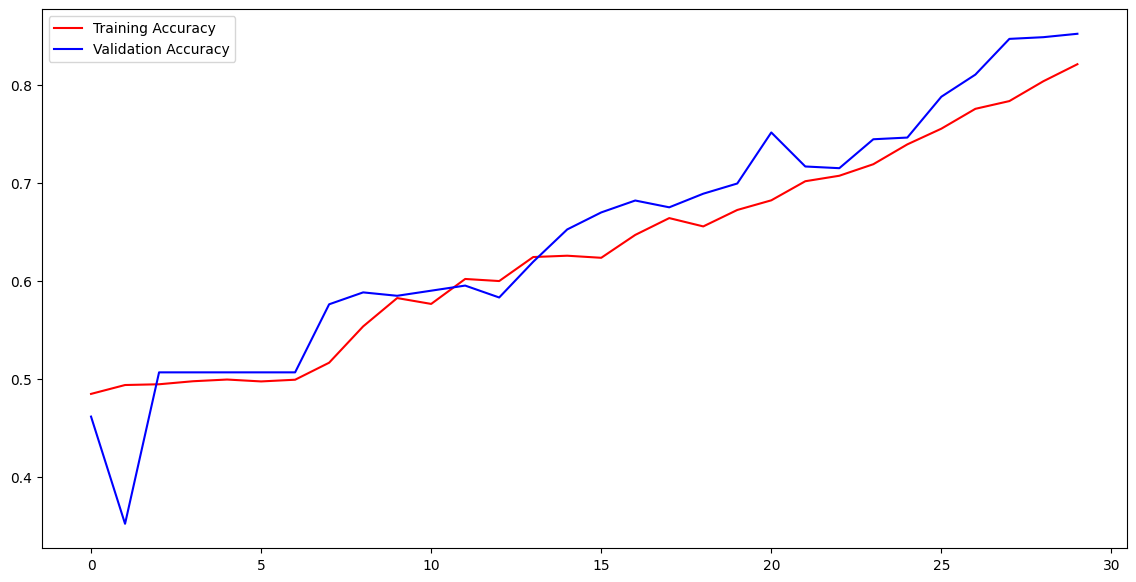

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

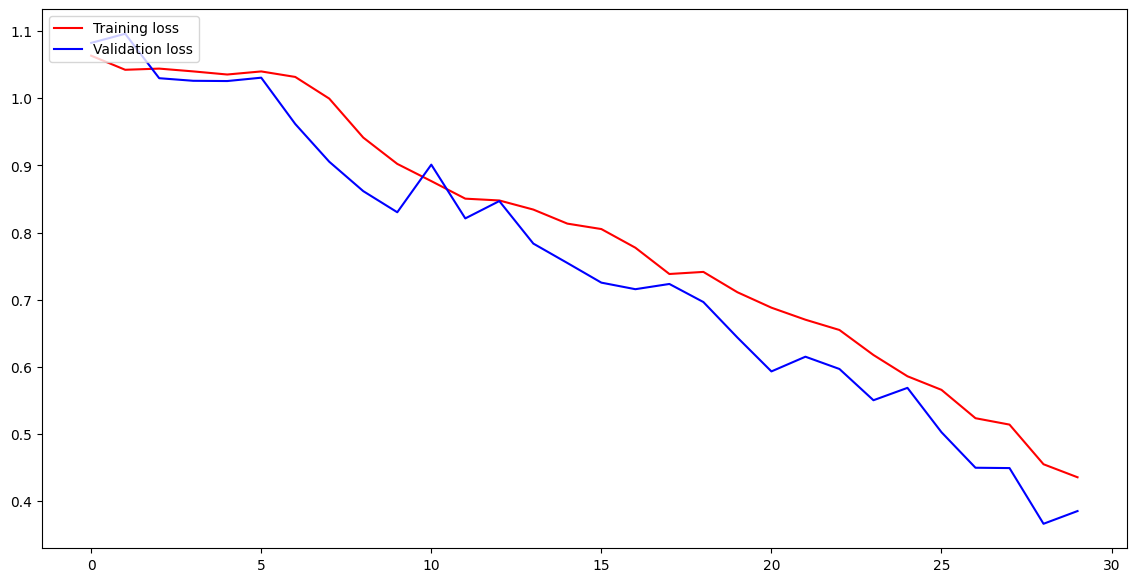

In [119]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [128]:
img = cv2.imread('A_dataset/Training/Mild_Demented/mildDem1.jpg')
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array.shape

(128, 128, 3)

In [129]:
img_array = img_array.reshape(1,128,128,3)
img_array.shape

(1, 128, 128, 3)

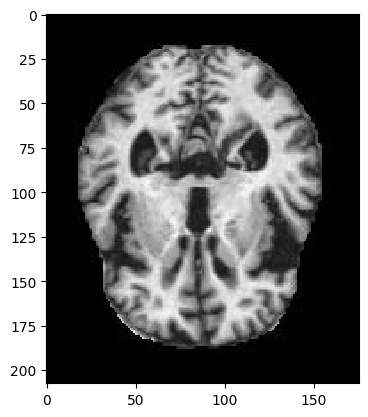

In [130]:
from tensorflow.keras.preprocessing import image
img = image.load_img('A_dataset/Training/Mild_Demented/mildDem1.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [131]:
from tensorflow.keras.models import load_model
model = load_model('alz_model.h5')

In [132]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 97ms/step


0